# Ungraded Lab: Decision Boundary


In this lab, you will plot the decision boundary for a logistic regression model, which will give you a better sense of what the model is predicting.


## Dataset

Let's suppose you have following training dataset
- The input variable `X` is a numpy array which has 6 training examples, each with two features
- The output variable `y` is also a numpy array with 6 examples, and `y` is either `0` or `1`

In [1]:
import numpy as np

X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1])

### Plot data 

Let's use a helper function to plot this data. The data points with label $y=1$ are shown as red crosses, while the data points with label $y=0$ are shown as black circles. 

Text(0.5, 0, '$x_1$')

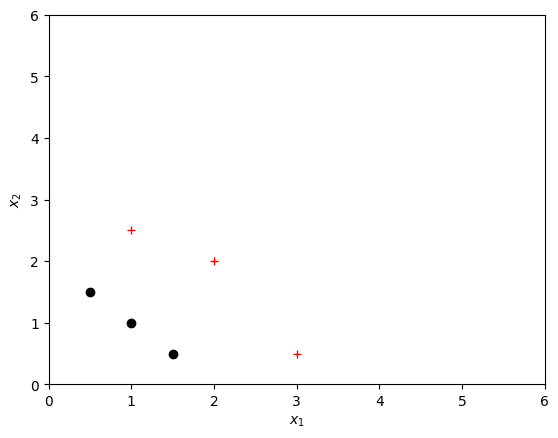

In [2]:
from lab_utils import plot_data
import matplotlib.pyplot as plt

plot_data(X, y)

# Set both axes to be from 0-6
plt.axis([0, 6, 0, 6])
# Set the y-axis label
plt.ylabel('$x_2$')
# Set the x-axis label
plt.xlabel('$x_1$')

## Logistic regression model


* Suppose you'd like to train a logistic regression model on this data which has the form   

  $f(x) = g(w_0 + w_1x_1+w_2x_2)$
  
  where $g(z) = \frac{1}{1+e^{-z}}$, which is the sigmoid function


* Let's say that you trained the model and get the parameters as $w_0 = -3, w_1 = 1, w_2 = 1$. That is,

  $f(x) = g(-3 + x_1+x_2)$

  (You'll learn how to fit these parameters to the data further in the course)
  
  
Let's try to understand what this trained model is predicting by plotting it's decision boundary

### Refresher on logistic regression and decision boundary

* Recall that for logistic regression, the model is represented as 

  $f(x) = g(w^Tx)$

  where

  $g(z) = \frac{1}{1+e^{-z}}$
  
  $g(z)$ is known as the sigmoid function and it maps all input values to values between 0 and 1.
  

* We interpret the output of the model ($f(x)$) as the probability that $y=1$ given $x$ and parameterized by $w$.
* Therefore, to get a final prediction ($y=0$ or $y=1$) from the logistic regression model, we can use the following heuristic -

  if $f(x) >= 0.5$, predict $y=1$
  
  if $f(x) < 0.5$, predict $y=0$
  
  
* Since, $f(x) = g(w^Tx)$, let's plot the sigmoid function to see where $g(z) >= 0.5$

We've implemented the `sigmoid` function for you already and you can simply import and use it, as shown in the code block below.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from lab_utils import sigmoid


# Plot sigmoid(z) over a range of values from -20 to 20
z = np.arange(-20,20)
plt.plot(z, sigmoid(z), c="b")

# Plot and annotate the point where sigmoid(z) = 0.5
plt.plot(0, sigmoid(0), 'ro')
plt.text(0, sigmoid(0), '(x={}, y={})'.format(0, sigmoid(0)))

* As you can see, $g(z) >= 0.5$ for $z >=0$

* For a logistic regression model, $z = w^Tx$. Therefore,

  if $w^Tx >= 0$, the model predicts $y=1$
  
  if $w^Tx < 0$, the model predicts $y=0$
  
  
  
### Plotting decision boundary

Now, let's go back to our example to understand how the logistic regression model is making predictions.

* Our logistic regression model has the form

  $f(x) = g(-3 + x_1+x_2)$


* From what you've learnt above, you can see that this model predicts $y=1$ if $-3 + x_1+x_2 >= 0$

Let's see what this looks like graphically. We'll start by plotting $-3 + x_1+x_2 = 0$, which is equivalent to $x_2 = 3 - x1$.

**Exercise**

Complete the code block below by writing `x2 = 3-x1`

In [ ]:
# Choose values between 0 and 6
x1 = np.arange(0,6)

### START CODE HERE ### 
x2 = 
### END CODE HERE ###

# Plot the decision boundary
plt.plot(x1,x2, c="b")
plt.axis([0, 6, 0, 6])

# Fill the region below the line
plt.fill_between(x1,x2, alpha=0.2)

# Plot the original data
plot_data(X,y)
# Set the y-axis label
plt.ylabel('x2')
# Set the x-axis label
plt.xlabel('x1')

* In the plot above, the blue line should represent the line $-3 + x_1+x_2 = 0$ and it should intersect the x1 axis at 3 (if we set $x_2$ = 0, $x_1$ = 3) and the x2 axis at 3 (if we set $x_1$ = 0, $x_2$ = 3). 


* The shaded region represents $-3 + x_1+x_2 < 0$. The region above the line is $-3 + x_1+x_2 > 0$.


* Therefore, for this model any point in the shaded region (under the line) is classified as $y=0$ and any point on or above the line is classified as $y=1$. This line is known as the "decision boundary".

As we've seen in the videos, by using higher order polynomial terms (eg: $f(x) = g(-1 + x_1^2 + x_2^2)$, we can come up with more complex non-linear boundaries.